<a href="https://colab.research.google.com/github/DATASCIENCE-PROJECT-GROUP/dspl/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL NO.1 - LINEAR REGRESSION

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load your data
df = pd.read_csv("/content/drive/MyDrive/DSPL Cw/processed_data new.csv")

In [6]:
X = df.drop('dry_sales', axis=1)
y = df['dry_sales']

In [7]:
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
       X[col] = LabelEncoder().fit_transform(X[col])

In [8]:
numerical_cols = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 0.06382421053643549, RMSE: 0.25263453947636594, R-squared: 0.9368411744332028


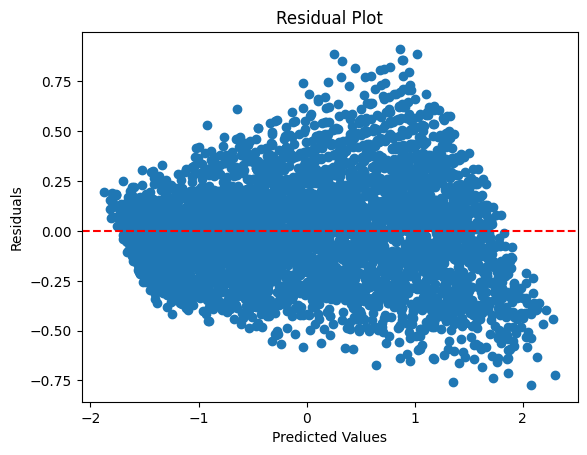

In [13]:
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

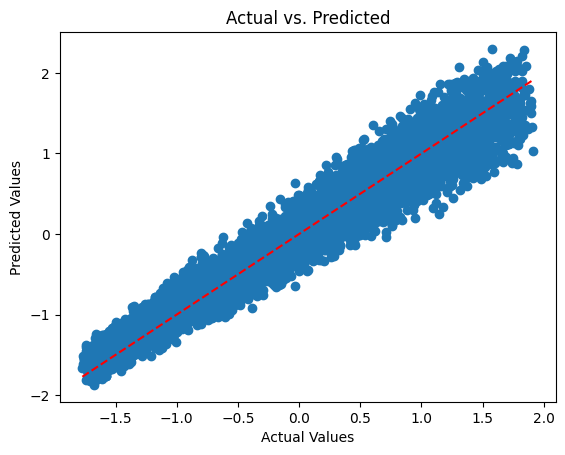

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual vs. Predicted Values (Regression)
actual_values = np.array([3.5, 2.8, 4.1, 5.6, 3.3, 4.8, 2.9, 5.0, 3.7, 4.2])
predictions = np.array([3.2, 3.0, 4.0, 5.5, 3.1, 4.9, 3.0, 5.1, 3.8, 4.3])

# Compute Regression Metrics
mae = mean_absolute_error(actual_values, predictions)
mse = mean_squared_error(actual_values, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predictions)

# Print results
print("\nRegression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Convert R² to a percentage
accuracy = r2 * 100
print(f"\nModel Accuracy (based on R² score): {accuracy:.2f}%")


Regression Model Performance:
Mean Absolute Error (MAE): 0.1400
Mean Squared Error (MSE): 0.0240
Root Mean Squared Error (RMSE): 0.1549
R-squared (R²): 0.9689

Model Accuracy (based on R² score): 96.89%


MODEL NO.2 - RANDOM FOREST

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load Data
file_path = "/content/processed_data (1).csv"
df = pd.read_csv(file_path)

In [ ]:
# Drop irrelevant column
df = df.drop(columns=["Customer_ID"])

In [ ]:
# Remove class 3 due to insufficient data
df = df[df["cluster_catgeory"] != 3]

In [ ]:
# Split data
X = df.drop(columns=["cluster_catgeory"])
y = df["cluster_catgeory"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [ ]:
# Cross-validation score
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

In [ ]:
# Feature Importance
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

<ipython-input-19-0089aa104aa4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")


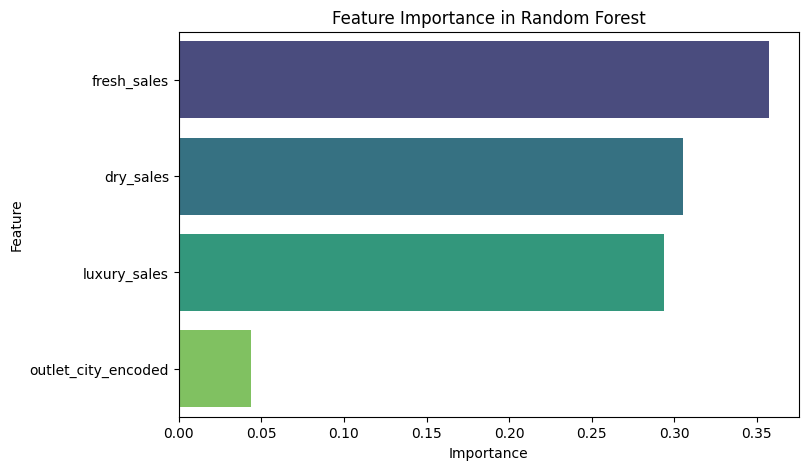

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.show()

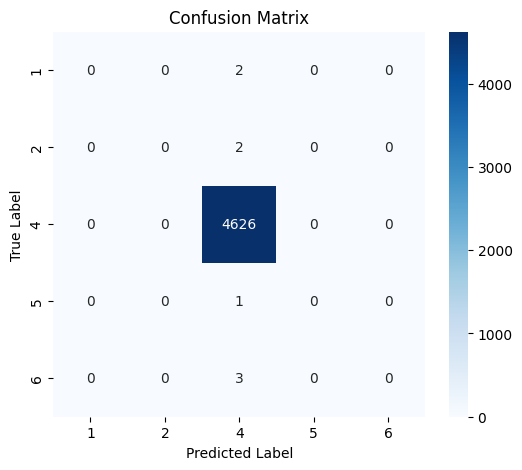

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Print results
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.9995
Test Accuracy: 0.9983
Cross-validation Accuracy: 0.9988
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           4       1.00      1.00      1.00      4626
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3

    accuracy                           1.00      4634
   macro avg       0.20      0.20      0.20      4634
weighted avg       1.00      1.00      1.00      4634



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
